##RESPONSIBLE AI TASKS 2 AND 3


# **Fairness and Biases**

In [ ]:
!pip install facets-overview

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 20
pd.options.display.float_format = "{:.1f}".format

from google.colab import widgets
# For facets
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.1.1
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

In [ ]:
COLUMNS = ["age", "workclass", "fnlwgt", "education", "education_num",
           "marital_status", "occupation", "relationship", "race", "gender",
           "capital_gain", "capital_loss", "hours_per_week", "native_country",
           "income_bracket"]

train_csv = tf.keras.utils.get_file('adult.data',
  'https://download.mlcc.google.com/mledu-datasets/adult_census_train.csv')
test_csv = tf.keras.utils.get_file('adult.test' ,
  'https://download.mlcc.google.com/mledu-datasets/adult_census_test.csv')

train_df = pd.read_csv(train_csv, names=COLUMNS, sep=r'\s*,\s*',
                       engine='python', na_values="?")
test_df = pd.read_csv(test_csv, names=COLUMNS, sep=r'\s*,\s*', skiprows=[0],
                      engine='python', na_values="?")
# Strip trailing periods mistakenly included only in UCI test dataset.
test_df['income_bracket'] = test_df.income_bracket.str.rstrip('.')

## Importing necessary libraries and dataset

In [ ]:
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': train_df, 'name': 'trainData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [ ]:
census_income_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
COLUMNS = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
df = pd.read_csv(census_income_url, header=None, names=COLUMNS, skipinitialspace=True)
df


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
 #Question 1: Identify Numerical and Categorical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:")
print(numerical_features)

# Display categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Categorical Features:
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


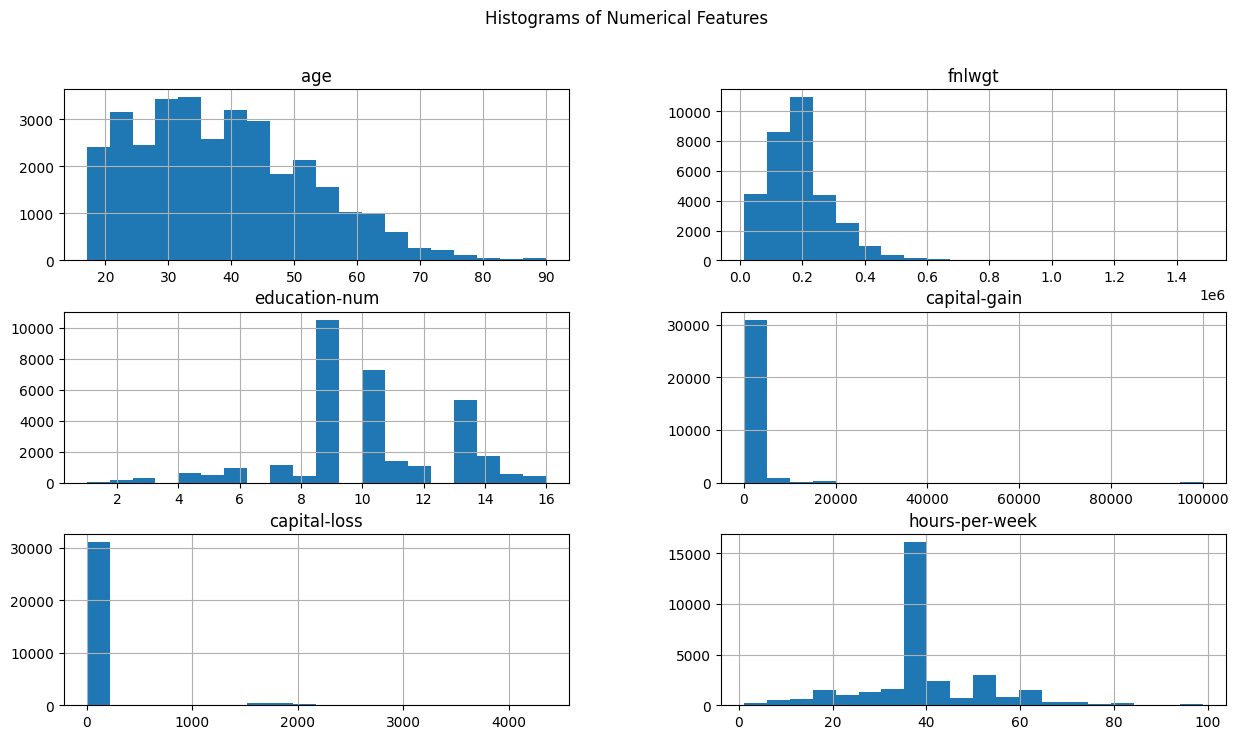

In [ ]:
#Visualizing the distribution of NUMERICAL FEATURES
numerical_features = df.select_dtypes(include=['number'])

numerical_features.hist(figsize=(15,8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

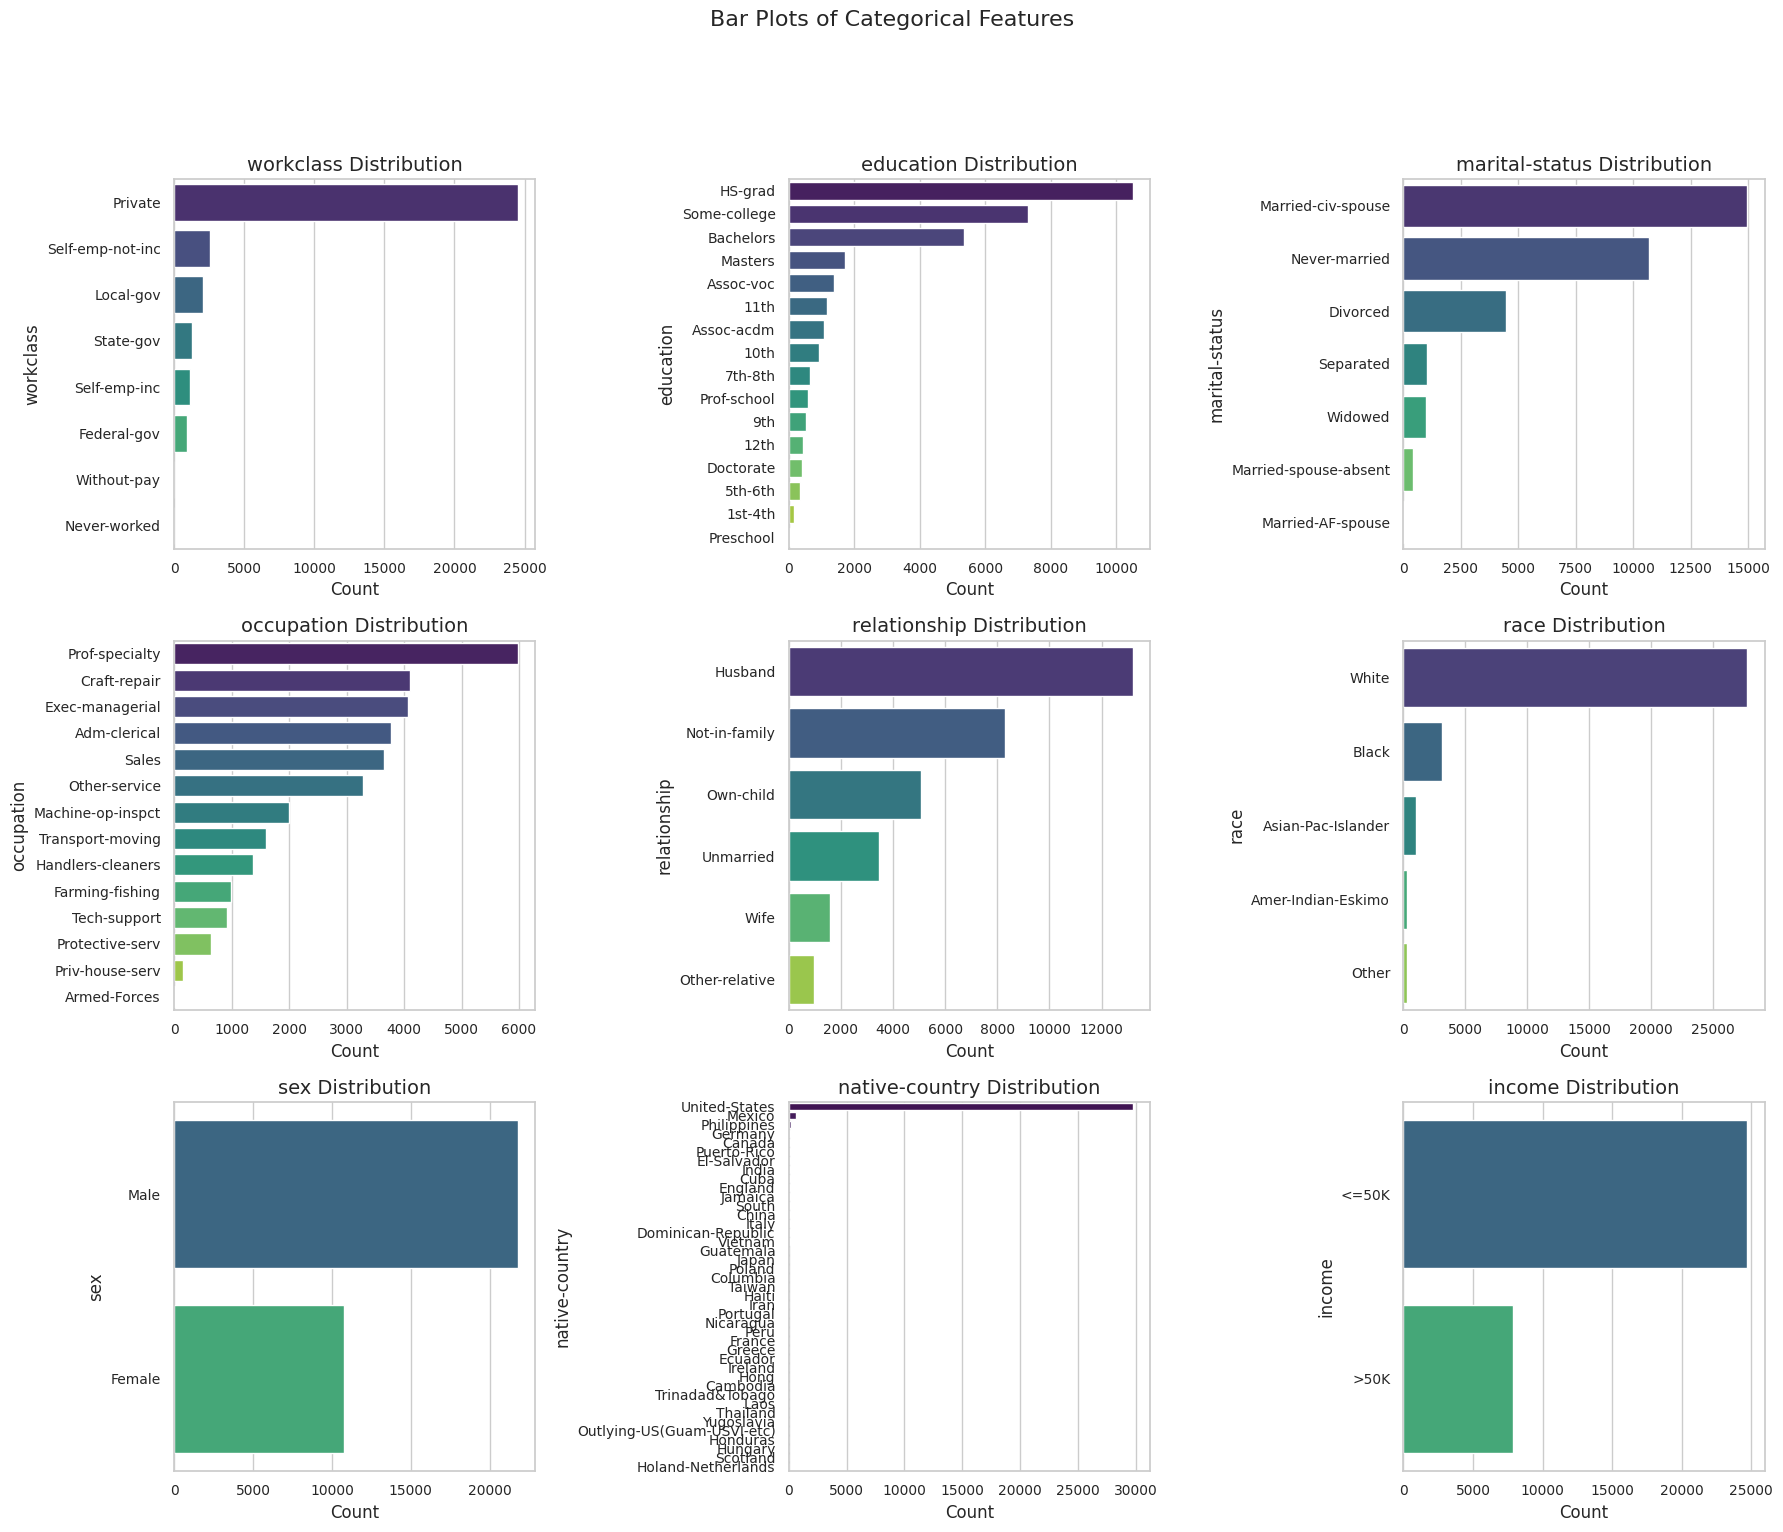

In [ ]:
# Visualizing the distribution of CATEGORICAL FEATURES
categorical_features = df.select_dtypes(include=['object'])
num_categorical_features = len(categorical_features.columns)

# Determine the number of rows and columns for subplots
num_rows = (num_categorical_features - 1) // 3 + 1
num_cols = min(num_categorical_features, 3)

plt.figure(figsize=(18, 5 * num_rows))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    if column == 'native-country':
        sns.barplot(x=df[column].value_counts(), y=df[column].value_counts().index, palette="viridis")
    else:
        sns.barplot(x=df[column].value_counts(), y=df[column].value_counts().index, palette="viridis")
    plt.title(f"{column} Distribution", fontsize=14)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout(pad=2.0)  # Add space between subplots

plt.suptitle("Bar Plots of Categorical Features", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout spacing
plt.show()


In [ ]:
df.replace("?", pd.NA, inplace=True)

In [ ]:
# Question 2: Check for Missing Feature Values
# Check for missing values
missing_values = df.isnull().sum()


# Identify features with a large number of missing observations
features_with_missing_values = missing_values
pd.set_option('display.max_rows', None)
# Display features with missing values
print(missing_values)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [ ]:
# Picking up the features with missing values
print('NaN values =', df.isnull().sum().sum())


Featuremissing_var = []

for feature in df.columns:
    Missing = df[feature].isna().sum()
    if Missing > 0:
        Featuremissing_var.append(feature)
        missing_val = Missing / df.shape[0]
        print('The feature  [{}] contains [{}] records [{:.2%}] with missing values.'.format(feature, Missing, missing_val))

print('The data contains [{}] features with missing values'.format(len(Featuremissing_var)))

NaN values = 4262
The feature  [workclass] contains [1836] records [5.64%] with missing values.
The feature  [occupation] contains [1843] records [5.66%] with missing values.
The feature  [native-country] contains [583] records [1.79%] with missing values.
The data contains [3] features with missing values


In [ ]:
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame with missing values
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])


In [ ]:
# Assuming df is your DataFrame with missing values
categorical_columns = df.select_dtypes(include=['object']).columns

# Fill missing values with the most frequent value for categorical columns
for column in categorical_columns:
    most_frequent_value = df[column].mode()[0]
    df[column] = df[column].fillna(most_frequent_value)


In [ ]:
# we check again
# Check for missing values
missing_values = df.isnull().sum()


# Identify features with a large number of missing observations
features_with_missing_values = missing_values
pd.set_option('display.max_rows', None)
# Display features with missing values
print(missing_values)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Text(0.5, 1.0, 'Age Distribution')

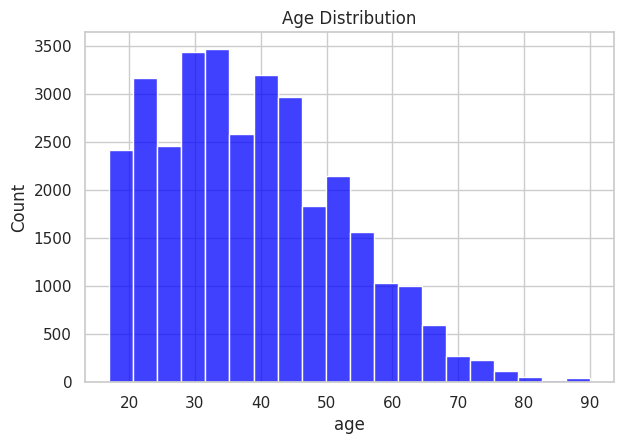

In [ ]:
# Question 3: Explore Data Skew with Histograms
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
# Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df["age"], kde=False, bins=20, color="blue")
plt.title("Age Distribution")

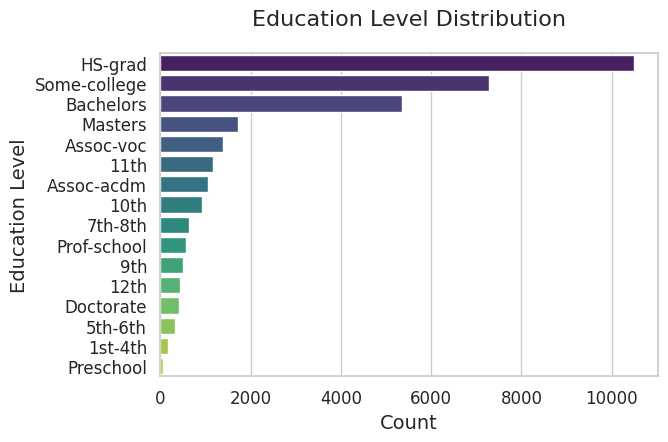

In [ ]:
# Education Level Distribution
plt.figure(figsize=(12, 8))  # Set the figure size for better visual appeal

plt.subplot(2, 2, 2)
sns.countplot(y="education", data=df, order=df["education"].value_counts().index, palette="viridis")
plt.title("Education Level Distribution", fontsize=16, pad=20, horizontalalignment='center')  # Adjust title font size, pad, and alignment
plt.xlabel("Count", fontsize=14)  # Add label for x-axis
plt.ylabel("Education Level", fontsize=14)  # Add label for y-axis
plt.xticks(fontsize=12)  # Adjust x-axis tick font size
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Text(0.5, 1.0, 'Income Bracket Distribution')

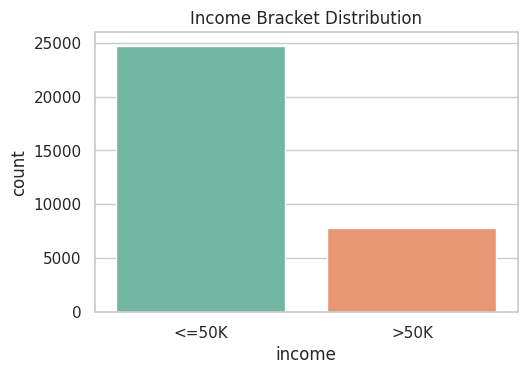

In [ ]:
# Income Bracket Distribution
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 3)
sns.countplot(x="income", data=df, palette="Set2")
plt.title("Income Bracket Distribution")

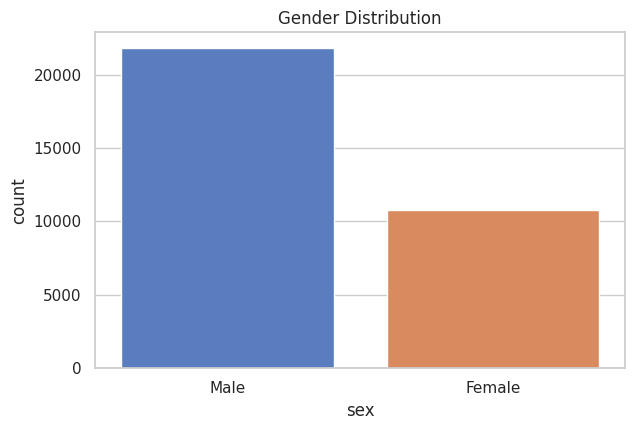

In [ ]:



plt.figure(figsize=(12, 8))

# Gender Distribution
plt.subplot(2, 2, 4)
sns.countplot(x="sex", data=df, palette="muted")
plt.title("Gender Distribution")

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

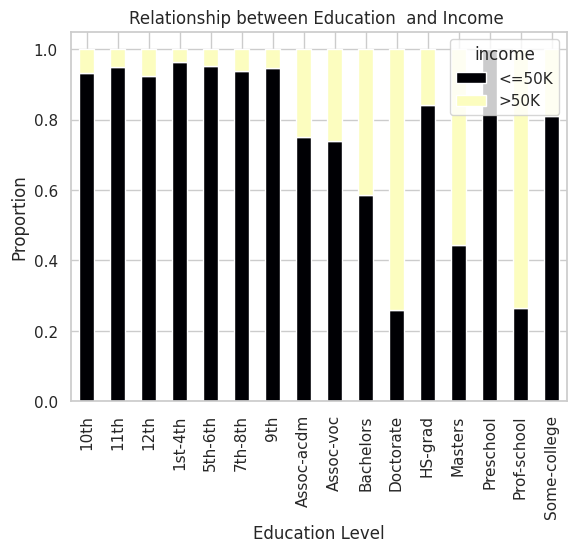

In [ ]:
# Question 4: Analyze the Relationship between Education  and Income
plt.figure(figsize=(12, 8))
education_income_relation = df.groupby("education")["income"].value_counts(normalize=True).unstack()
education_income_relation.plot(kind="bar", stacked=True, colormap="magma")
plt.title("Relationship between Education  and Income ")
plt.xlabel("Education Level")
plt.ylabel("Proportion")
plt.show()



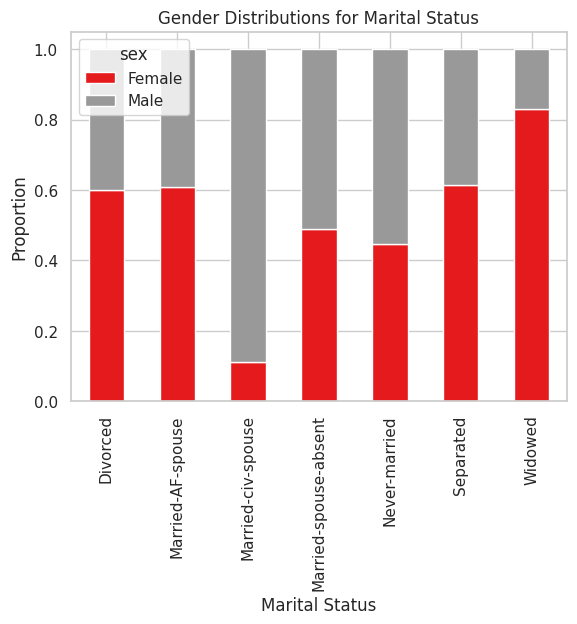

In [ ]:
# Question 5: Explore Gender Distributions for Marital Status
marital_gender_distribution = df.groupby("marital-status")["sex"].value_counts(normalize=True).unstack()
marital_gender_distribution.plot(kind="bar", stacked=True, colormap="Set1")
plt.title("Gender Distributions for Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Proportion")
plt.show()

# Task 3
# Interpretability of ML Model **bold text**

In [ ]:


# URL of the Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Define column names based on the dataset documentation
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Read the dataset into a DataFrame
dataset = pd.read_csv(url, header=None, names=column_names, na_values="?")

# Display the first few rows of the dataset
print(dataset .head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0 63.0  1.0 1.0     145.0 233.0  1.0      2.0    150.0    0.0      2.3    3.0   
1 67.0  1.0 4.0     160.0 286.0  0.0      2.0    108.0    1.0      1.5    2.0   
2 67.0  1.0 4.0     120.0 229.0  0.0      2.0    129.0    1.0      2.6    2.0   
3 37.0  1.0 3.0     130.0 250.0  0.0      0.0    187.0    0.0      3.5    3.0   
4 41.0  0.0 2.0     130.0 204.0  0.0      2.0    172.0    0.0      1.4    1.0   

   ca  thal  target  
0 0.0   6.0       0  
1 3.0   3.0       2  
2 2.0   7.0       1  
3 0.0   3.0       0  
4 0.0   3.0       0  


In [ ]:
!pip install shap

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# Load the Heart Disease UCI dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=names)

# Preprocess the data
data.replace('?', np.nan, inplace=True)
data = data.dropna()
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Calculate SHAP values
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Calculate feature importance scores
importance = np.abs(model.coef_[0])
feature_names = X.columns
feature_importance = pd.DataFrame(list(zip(feature_names, importance)), columns=['feature', 'importance'])
feature_importance = feature_importance.sort_values(by='importance', ascending=False)


print(feature_importance )


     feature  importance
11        ca         1.1
2         cp         0.6
1        sex         0.6
12      thal         0.5
3   trestbps         0.5
7    thalach         0.5
10     slope         0.4
9    oldpeak         0.4
6    restecg         0.3
5        fbs         0.3
8      exang         0.2
4       chol         0.2
0        age         0.1


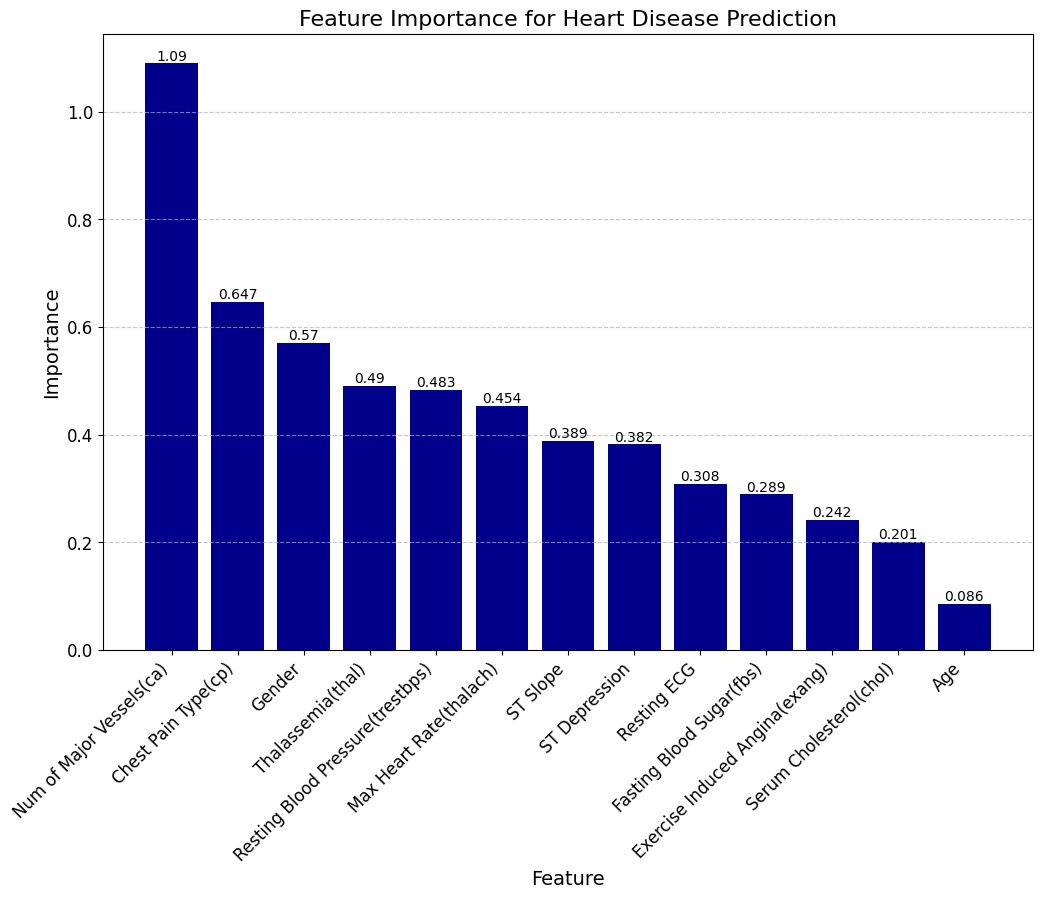

In [ ]:
import seaborn as sns

# Define abbreviations for features
abbreviations = {
    'age': 'Age',
    'sex': 'Gender',
    'cp': 'Chest Pain Type(cp)',
    'trestbps': 'Resting Blood Pressure(trestbps)',
    'chol': 'Serum Cholesterol(chol)',
    'fbs': 'Fasting Blood Sugar(fbs)',
    'restecg': 'Resting ECG',
    'thalach': 'Max Heart Rate(thalach)',
    'exang': 'Exercise Induced Angina(exang)',
    'oldpeak': 'ST Depression',
    'slope': 'ST Slope',
    'ca': 'Num of Major Vessels(ca)',
    'thal': 'Thalassemia(thal)',
    'target': 'Heart Disease Presence'
}

import seaborn as sns

# Set a color palette for the plot
colors = 'darkblue'

# Map feature names to abbreviations
feature_importance['feature_abbrev'] = feature_importance['feature'].map(abbreviations)

# Sort feature importance scores in descending order
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Plot feature importance scores with abbreviations
plt.figure(figsize=(12, 8))
bars = plt.bar(feature_importance['feature_abbrev'], feature_importance['importance'], color=colors)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importance for Heart Disease Prediction', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations with feature importance values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


<Figure size 1400x600 with 0 Axes>

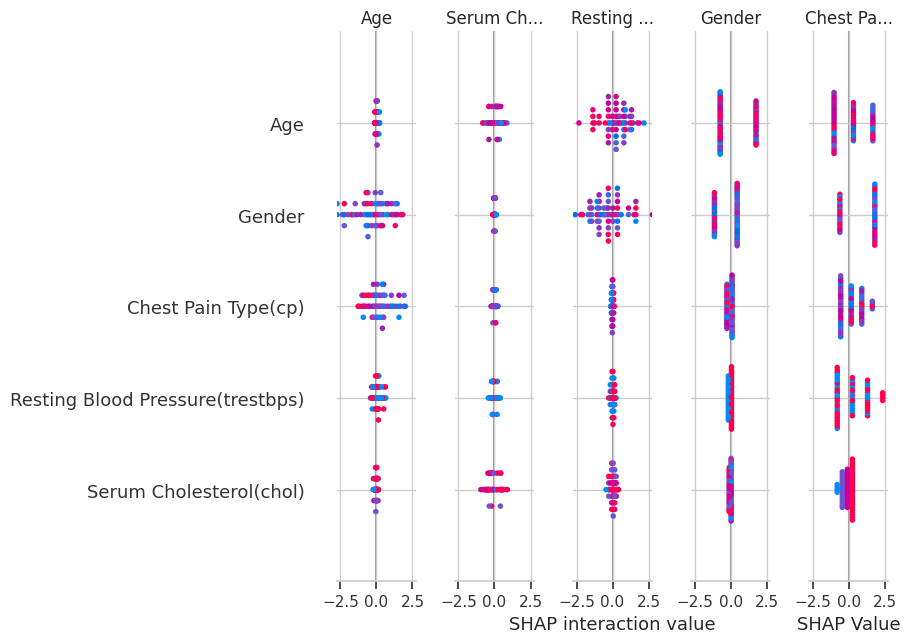

In [ ]:
# Plot SHAP summary plot with abbreviations
plt.figure(figsize=(14, 6))
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_importance['feature_abbrev'], show=False)

# Manually adjust the layout for better readability
plt.tight_layout(rect=[0, 1, 1,2])  # Increase bottom parameter for more white space
plt.xlabel("SHAP Value")



plt.show()




1.   Chest pain, sex, thallium stress results, resting blood pressure, maximal heart rate, exercise-induced angina, and age are important factors in the prediction of heart disease.




2.   Comprehending these variables facilitates the creation of predictive and proactive approaches for persons who are more susceptible.




##SHAP values and establishing a baseline enhance model interpretability, providing insights into the role of specific variables in predicting heart disease.

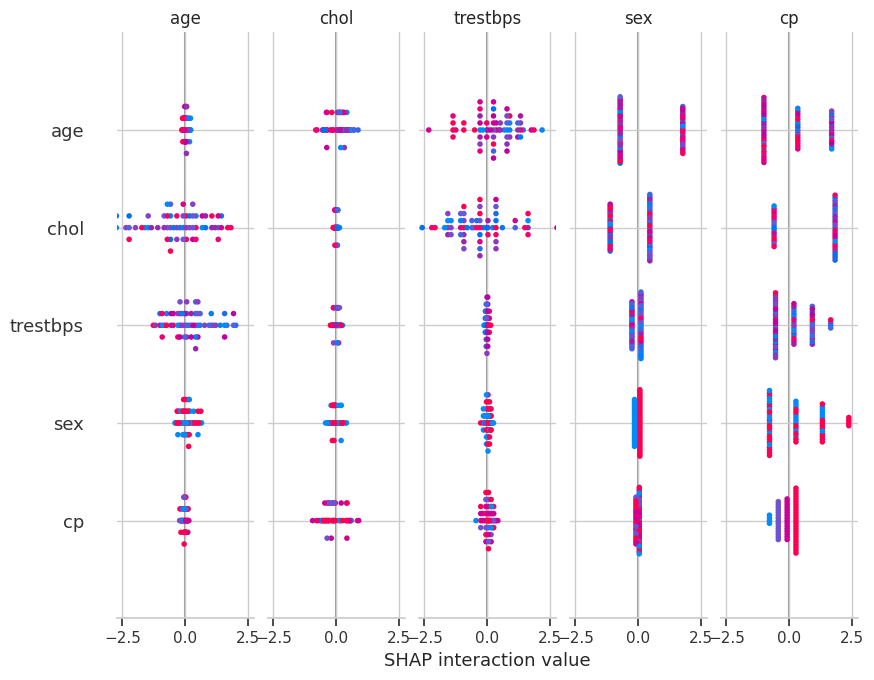

In [ ]:
# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)



1.   A heart disease prediction model's dynamic collaborations among its major elements are emphasised by the SHAP interaction value graphic.
2.   Notable findings include a strong correlation between sex and cholesterol, indicating a higher risk for women with high cholesterol, and age and chest pain type showing a considerable rise in risk.
3.   With the use of this graphic, accurate and understandable cardiac disease prediction models may be created, allowing for more focused preventive efforts and individualised medical care.





